In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask.array as da
import os
import sys
import logging


logging.getLogger('matplotlib.font_manager').disabled = True
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.WARNING)

matplotlib_logger = logging.getLogger('matplotlib')
matplotlib_logger.setLevel(logging.WARNING)

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(src_path)
sys.path.append(src_path)

from src.Analysis import Analysis, AnalysisManager, GR_Confirmation, SpotDetection_Confirmation

c:\Users\formanj\GitHub\AngelFISH


Loads in the data from specified location

In [2]:
loc = None # r"Y:\smFISH_images\Eric_smFISH_images\20230511\GR_ICC_3hr_R1_1nM_0min_050823\GR_ICC_3hr_R1_1nM_0min_050823.h5"
log_location = r'\\munsky-nas.engr.colostate.edu\share\Users\Jack\All_Analysis'  # r'Y:\Users\Jack\All_Analysis'
am = AnalysisManager(location=loc, log_location=log_location) # change this to your mounted drive location for this folder
# This analysis is best done with the NAS mounted 

In [3]:
# list all analysis done 
am.list_analysis_names()

Analysis_ER_Dec0324_DUSP1_2025-01-07
Analysis_ER_Dec0324_2025-01-06
Analysis_ER_Dec0324_2024-12-19
Analysis_ER_Dec0324_GR_2024-12-20
Analysis_ER_Dec0324_DUSP1_2024-12-19
Analysis_ER_Dec1924_wCyto_2024-12-19


['Analysis_ER_Dec0324_DUSP1_2025-01-07',
 'Analysis_ER_Dec0324_2025-01-06',
 'Analysis_ER_Dec0324_2024-12-19',
 'Analysis_ER_Dec0324_GR_2024-12-20',
 'Analysis_ER_Dec0324_DUSP1_2024-12-19',
 'Analysis_ER_Dec1924_wCyto_2024-12-19']

In [4]:
# can filter on name and dates
am.select_analysis('ER_Dec0324_GR')
print(am.analysis)

[<HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 members)>, <HDF5 group "/Analysis_ER_Dec0324_GR_2024-12-20" (4 me

Does analysis/confirmation

In [5]:
# select GR conformation analysis 
GR = GR_Confirmation(am)

In [6]:
# this loads the data into memory 
GR.get_data()

In [7]:
# This is a temporary fix, I didnt do this in the correct spot in the first run
# this will be fixed in future runs
for h5 in np.unique(GR.cellprops['h5_idx']):
    GR.cellprops.loc[GR.cellprops['h5_idx'] == h5, 'fov'] = pd.Categorical(GR.cellprops.loc[GR.cellprops['h5_idx'] == h5, 'fov']).codes


In [8]:
# make sure this has all the measurements you want
GR.cellprops.keys()

Index(['nuc_label', 'nuc_bbox-0', 'nuc_bbox-1', 'nuc_bbox-2', 'nuc_bbox-3',
       'nuc_area', 'nuc_centroid-0', 'nuc_centroid-1', 'nuc_intensity_max-0',
       'nuc_intensity_max-1', 'nuc_intensity_mean-0', 'nuc_intensity_mean-1',
       'nuc_intensity_min-0', 'nuc_intensity_min-1', 'nuc_intensity_std-0',
       'nuc_intensity_std-1', 'nuc_touching_border', 'cell_label',
       'cell_bbox-0', 'cell_bbox-1', 'cell_bbox-2', 'cell_bbox-3', 'cell_area',
       'cell_centroid-0', 'cell_centroid-1', 'cell_intensity_max-0',
       'cell_intensity_max-1', 'cell_intensity_mean-0',
       'cell_intensity_mean-1', 'cell_intensity_min-0', 'cell_intensity_min-1',
       'cell_intensity_std-0', 'cell_intensity_std-1', 'cell_touching_border',
       'cyto_label', 'cyto_bbox-0', 'cyto_bbox-1', 'cyto_bbox-2',
       'cyto_bbox-3', 'cyto_area', 'cyto_centroid-0', 'cyto_centroid-1',
       'cyto_intensity_max-0', 'cyto_intensity_max-1', 'cyto_intensity_mean-0',
       'cyto_intensity_mean-1', 'cyto_inte

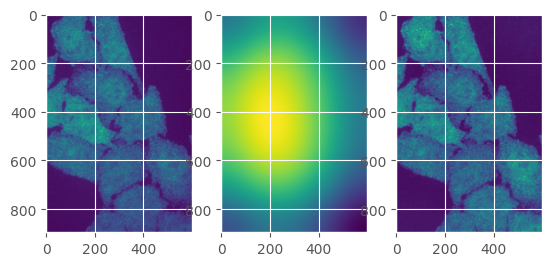

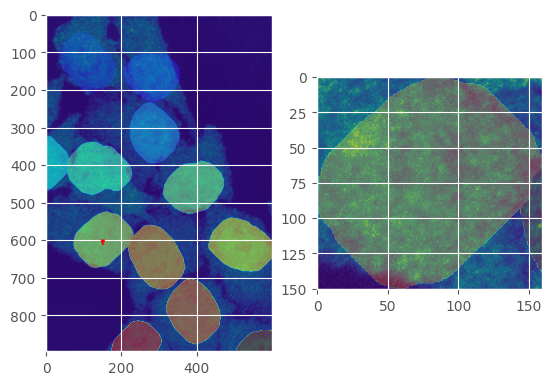

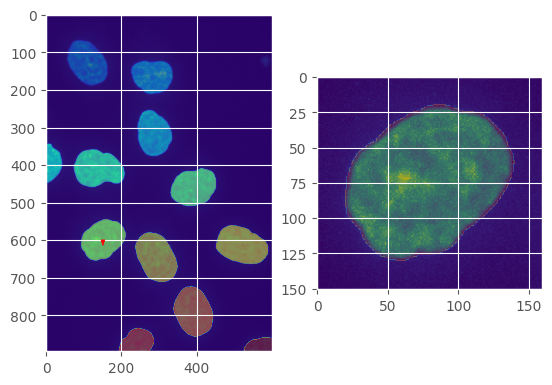

    measurement  numpy calculated  step calculated  are close?
0     cell_area      16445.000000     16445.000000        True
1      nuc_area       9501.000000      9501.000000        True
2     cyto_area       6944.000000      6944.000000        True
3   cell_avgInt          1.326942         1.326944        True
4    nuc_avgInt          1.366838         1.366839        True
5   cell_stdInt               NaN         0.227034       False
6    nuc_stdInt               NaN         0.180107       False
7   cell_maxInt          2.351333         2.351333        True
8    nuc_maxInt          2.223159         2.223159        True
9   cell_minInt          0.469207         0.469207        True
10   nuc_minInt          0.814444         0.814444        True


In [9]:
# run this multiple times to see a new randomly selected cell
GR.display()

In [10]:
GR.cellprops

,nuc_label,nuc_bbox-0,nuc_bbox-1,nuc_bbox-2,nuc_bbox-3,nuc_area,nuc_centroid-0,nuc_centroid-1,nuc_intensity_max-0,nuc_intensity_max-1,...,cyto_intensity_std-1,cyto_touching_border,fov,timepoint,condition,replica,time,Dex_Conc,NAS_location,h5_idx
18,19,768,236,875,352,9483.0,821.993040,294.927660,2.009923,4.435301,...,0.107357,1.0,0,0,GR_timesweep,A,0,0,smFISH_images/Eric_smFISH_images/20230522/GR_I...,0
2,3,20,337,118,414,5385.0,71.991272,373.131662,2.159135,4.640402,...,0.102532,1.0,0,0,GR_timesweep,A,0,0,smFISH_images/Eric_smFISH_images/20230522/GR_I...,0
3,4,131,465,261,576,10367.0,197.741294,521.676473,2.228770,4.399673,...,0.084441,1.0,0,0,GR_timesweep,A,0,0,smFISH_images/Eric_smFISH_images/20230522/GR_I...,0
0,1,0,444,19,513,974.0,7.383984,476.890144,1.803846,3.702838,...,0.127144,1.0,0,0,GR_timesweep,A,0,0,smFISH_images/Eric_smFISH_images/20230522/GR_I...,0
1,2,9,162,99,269,6558.0,52.837450,212.749466,2.259955,5.250562,...,0.550782,1.0,0,0,GR_timesweep,A,0,0,smFISH_images/Eric_smFISH_images/20230522/GR_I...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,9,464,95,599,194,9514.0,525.542884,146.764978,3.849877,5.882750,...,0.122479,1.0,19,0,GR_timesweep,A,90,1,smFISH_images/Eric_smFISH_images/20230516/GR_I...,35
0,1,15,327,97,446,6970.0,54.486944,386.378623,4.390272,5.085583,...,0.108138,1.0,19,0,GR_timesweep,A,90,1,smFISH_images/Eric_smFISH_images/20230516/GR_I...,35
1,2,48,161,154,271,7702.0,101.667359,214.114646,4.249820,7.729602,...,0.152737,1.0,19,0,GR_timesweep,A,90,1,smFISH_images/Eric_smFISH_images/20230516/GR_I...,35
9,10,565,351,682,470,10364.0,623.282902,411.472115,3.692887,5.371088,...,0.115437,1.0,19,0,GR_timesweep,A,90,1,smFISH_images/Eric_smFISH_images/20230516/GR_I...,35


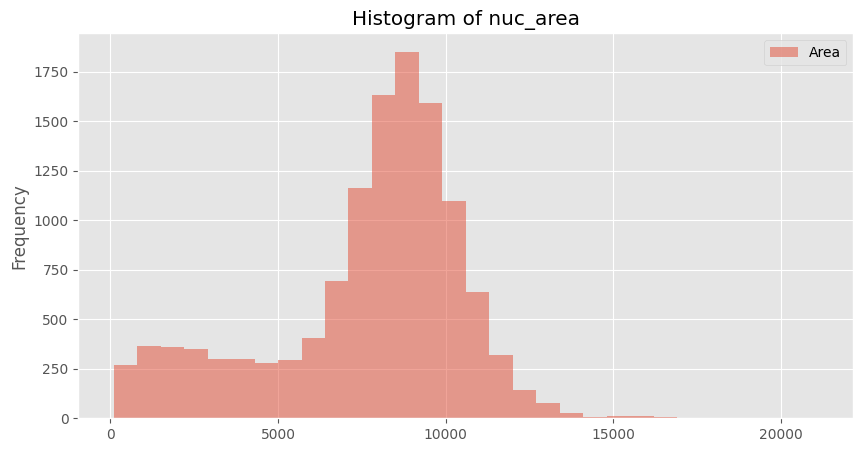

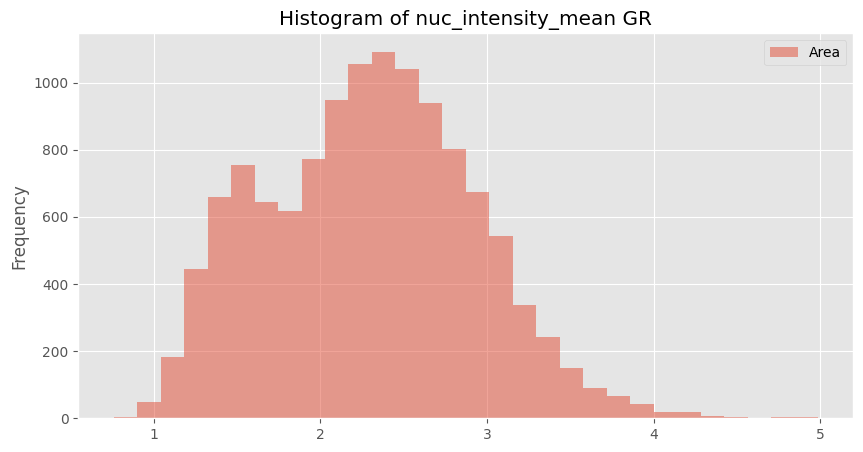

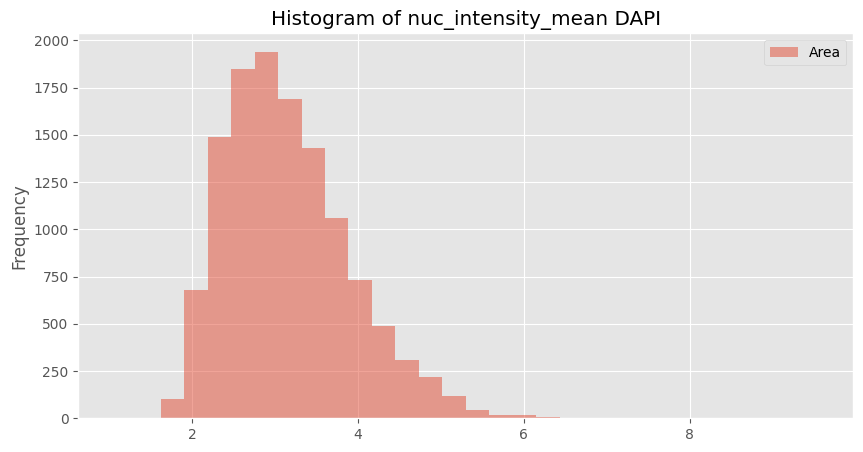

In [11]:
keys_to_plot = ['nuc_area', 'nuc_intensity_mean']
channel_maps = {'-1': ' DAPI', '-0': ' GR'}
for k in GR.cellprops.keys():
    if k in keys_to_plot or k.split('-')[0] in keys_to_plot:
        # Plot histogram for 'area'
        plt.figure(figsize=(10, 5))
        plt.hist(GR.cellprops[k], bins=30, alpha=0.5, label='Area')
        plt.ylabel('Frequency')
        for suffix, channel in channel_maps.items():
            if k.endswith(suffix):
                k = k.replace(suffix, channel)
                break
        plt.title(f'Histogram of {k}')
        plt.legend()
        plt.show()

[0, 10, 20, 30, 40, 50, 60, 75, 90, 120, 150, 180]
[0, 1, 10, 100]


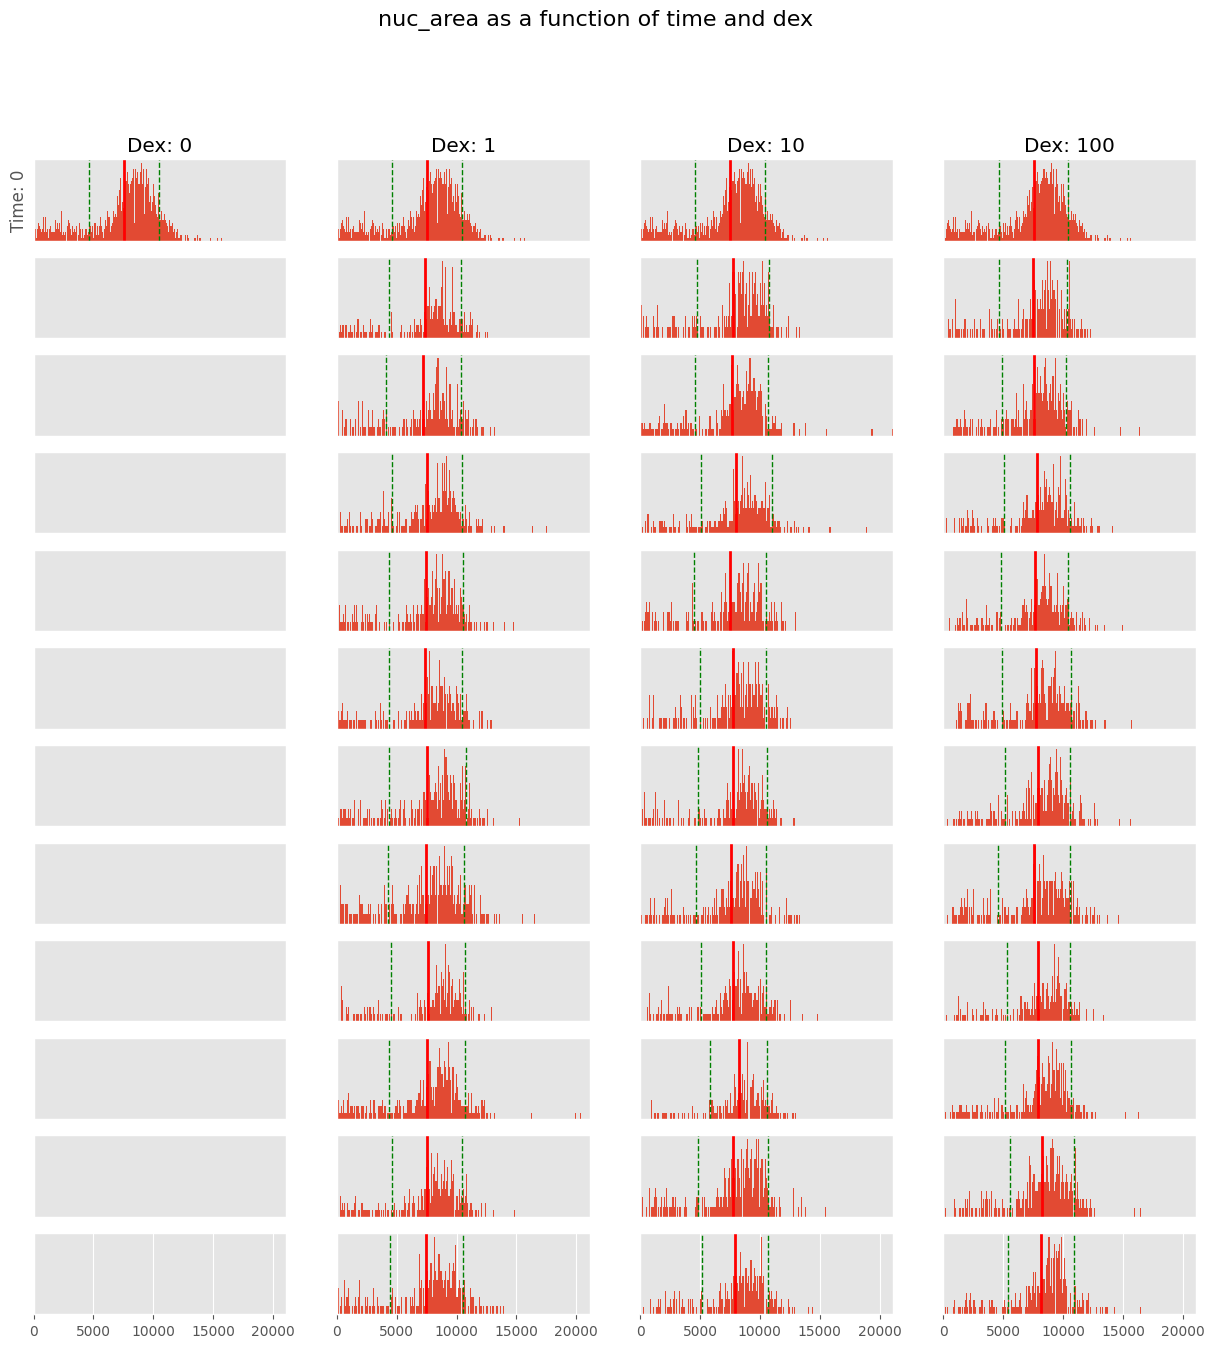

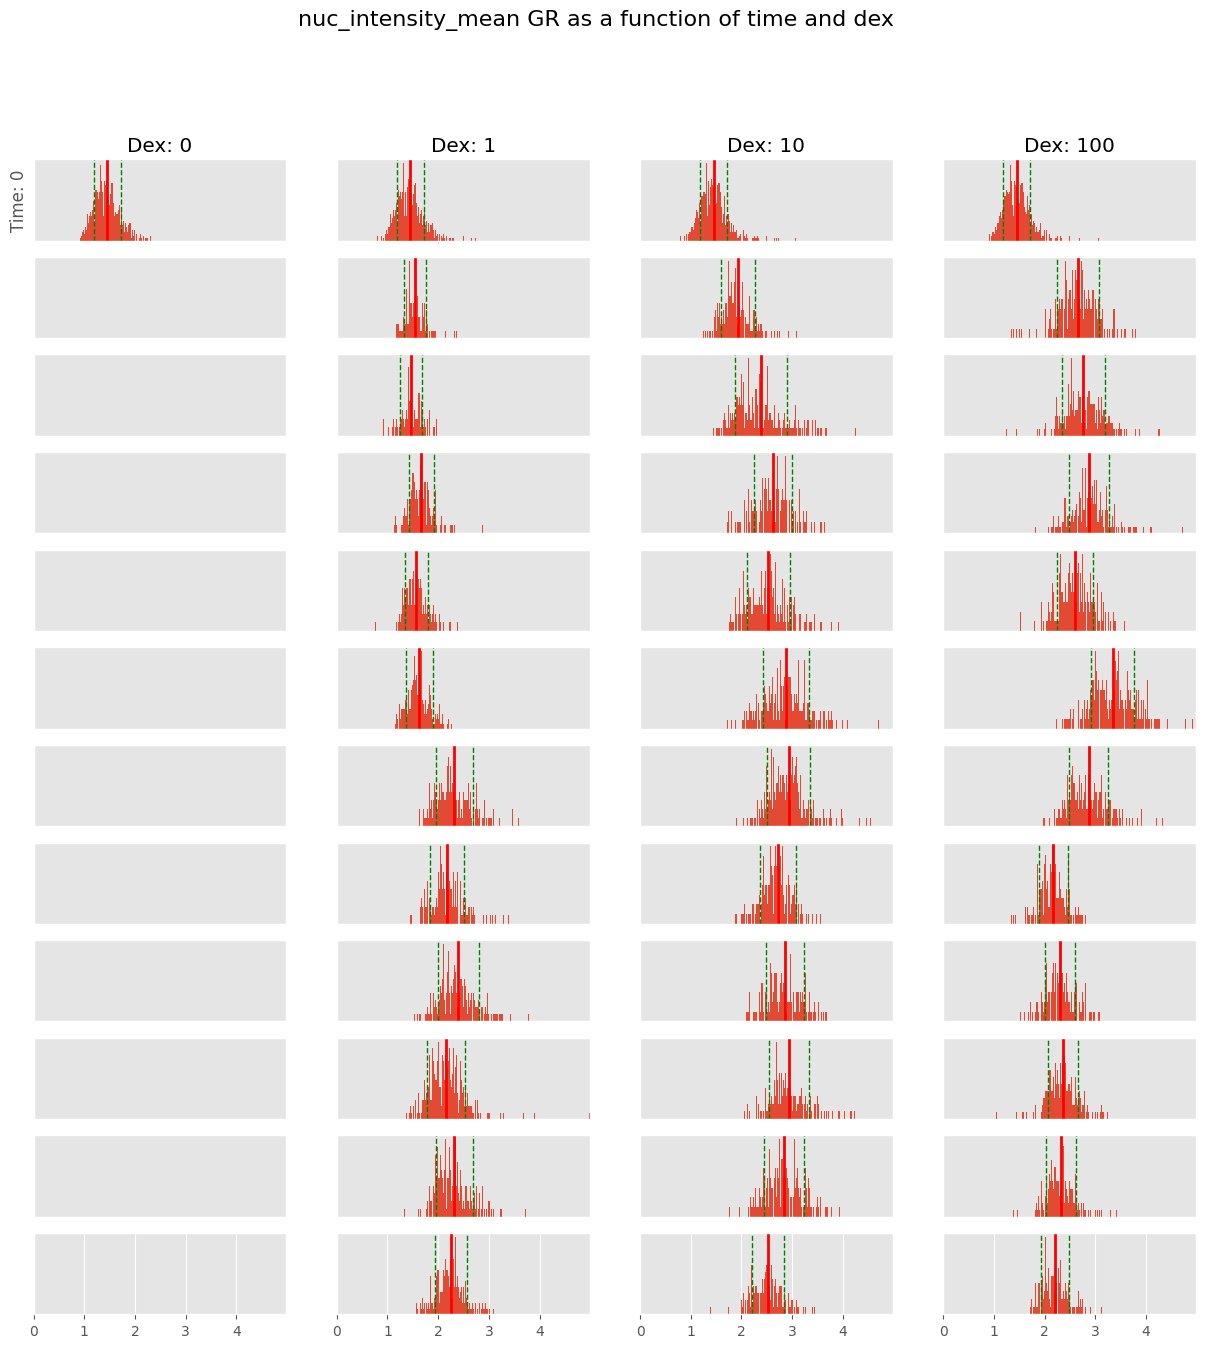

In [12]:
# spot counts as a function of time and dex
tp_set = sorted(set(GR.cellprops['time']))
print(tp_set)
dex_set = sorted(set(GR.cellprops['Dex_Conc']))
print(dex_set)
keys_to_plot = ['nuc_area', 'nuc_intensity_mean-0']
for k in keys_to_plot:
    fig, axs = plt.subplots(len(tp_set), len(dex_set), figsize=(15, 15))
    for suffix, channel in channel_maps.items():
        if k.endswith(suffix):
            l = k.replace(suffix, channel)
            break
        else:
            l = k
    fig.suptitle(f'{l} as a function of time and dex', fontsize=16)
    for i_d, d in enumerate(dex_set):
        data = GR.cellprops[GR.cellprops['Dex_Conc'] == d]
        for i_t, t in enumerate(tp_set):
            temp = data[data['time'] == t]
            mean_val = temp[k].mean()
            std_val = temp[k].std()
            if d == 0 and t == 0:
                for ax in axs[i_t, :]:
                    ax.hist(temp[k], bins=200, density=True)
                    ax.axvline(mean_val, color='r', linestyle='solid', linewidth=2)
                    ax.axvline(mean_val + std_val, color='g', linestyle='dashed', linewidth=1)
                    ax.axvline(mean_val - std_val, color='g', linestyle='dashed', linewidth=1)
                    ax.set_xlim([0, GR.cellprops[k].max()])
                    ax.set_yticks([])
            else:
                axs[i_t, i_d].hist(temp[k], bins=200, density=True)
                axs[i_t, i_d].axvline(mean_val, color='r', linestyle='solid', linewidth=2)
                axs[i_t, i_d].axvline(mean_val + std_val, color='g', linestyle='dashed', linewidth=1)
                axs[i_t, i_d].axvline(mean_val - std_val, color='g', linestyle='dashed', linewidth=1)
                axs[i_t, i_d].set_xlim([0, GR.cellprops[k].max()])
                axs[i_t, i_d].set_yticks([])
                if i_t != len(tp_set) - 1:
                    axs[i_t, i_d].set_xticks([])
            axs[i_t, 0].set_ylabel(f'Time: {t}')
            axs[0, i_d].set_title(f'Dex: {d}')
    plt.show()



In [13]:
GR.close()